In [34]:
#Importing libraries
import keras
from keras.models import Sequential  #Sequential model means that all the layers of the model will be arranged in sequence
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,Dropout #Importing Layers for vgg16 to be used in vgg19
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.optimizers import Adam

In [2]:
#Connecting google drive with collab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [35]:
#Path of Train,testing and validation directories and saving them in variables.
train_data_dir = r"/content/drive/MyDrive/Colab Notebooks/2k_dataset/2k_images/processed_data/train"   #Train Path
valid_data_dir = r"/content/drive/MyDrive/Colab Notebooks/2k_dataset/2k_images/processed_data/val"     #Validation Path
test_data_dir = r"/content/drive/MyDrive/Colab Notebooks/2k_dataset/2k_images/processed_data/test"     #Testing Path 

In [36]:
datagen = ImageDataGenerator(rescale=1.0/255)
datagentrain = ImageDataGenerator(rescale=1.0/255,horizontal_flip=True,rotation_range=90)

train_batches = datagentrain.flow_from_directory(directory=train_data_dir, target_size=(224,224), batch_size=32,shuffle=True)   #1500 images , 1500/32 = 47(Steps per Epoch)
valid_batches = datagen.flow_from_directory(directory=valid_data_dir, target_size=(224,224), batch_size=32)
test_batches = datagen.flow_from_directory(directory=test_data_dir, target_size=(224,224), batch_size=1)

Found 1500 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [37]:
#---------------------------------------------------------------------------------------
# add preprocessing layer to the front of VGG
#include_top=False argument is to load a network that doesn't include the classification layers at the top
#vgg = VGG16(include_top=False, weights=None, input_shape= (224,224,3))
#---------------------------------------------------------------------------------------------------------


#Here we are manually adding layers OR we could have used above 'commented' code for adding layers and using only 4 layers
#Extra 19 layers have been added
model = Sequential()   #Sequential model means that all the layers of the model will be arranged in sequence

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(units=4096,activation="relu"))
model.add(Dropout(rate = 0.2))
model.add(Dense(units=2, activation="softmax")) #units = '2' because we have are working on 2 classes

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_53 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_55 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [38]:
# tell the model what cost and optimization method to use
model.compile(optimizer=Adam(learning_rate=1e-5),loss="binary_crossentropy",metrics=["accuracy"])

In [39]:
history=model.fit_generator(generator=train_batches,validation_data=test_batches,validation_steps=len(test_batches),steps_per_epoch=47,epochs=25,verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/25
47/47 [==============================] - 64s 1s/step - loss: 0.6930 - accuracy: 0.5107 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/25
47/47 [==============================] - 62s 1s/step - loss: 0.6873 - accuracy: 0.5300 - val_loss: 0.6863 - val_accuracy: 0.5533
Epoch 3/25
47/47 [==============================] - 62s 1s/step - loss: 0.6289 - accuracy: 0.6340 - val_loss: 0.6363 - val_accuracy: 0.6167
Epoch 4/25
47/47 [==============================] - 62s 1s/step - loss: 0.5915 - accuracy: 0.6827 - val_loss: 0.5743 - val_accuracy: 0.7000
Epoch 5/25
47/47 [==============================] - 62s 1s/step - loss: 0.5747 - accuracy: 0.6947 - val_loss: 0.5641 - val_accuracy: 0.7133
Epoch 6/25
47/47 [==============================] - 62s 1s/step - loss: 0.5489 - accuracy: 0.7187 - val_loss: 0.5444 - val_accuracy: 0.7300
Epoch 7/25
47/47 [==============================] - 62s 1s/step - loss: 0.5276 - accuracy: 0.7293 - val_loss: 0.5847 - val_accuracy: 0.6733
Epoch 8/25
47/47 [==

In [40]:
from tensorflow.keras.models import load_model
#new_model = load_model('/content/drive/MyDrive/Colab Notebooks/2k_dataset/vgg16_224x224.h5') 
model.save("/content/drive/MyDrive/Colab Notebooks/2k_dataset/vgg19_updated_224_manual_wali.h5")

In [41]:
test_loss, test_acc = model.evaluate(test_batches, verbose=1)
print("\nTest accuracy:", test_acc)

300/300 [==============================] - 15s 48ms/step - loss: 0.2166 - accuracy: 0.9500

Test accuracy: 0.949999988079071


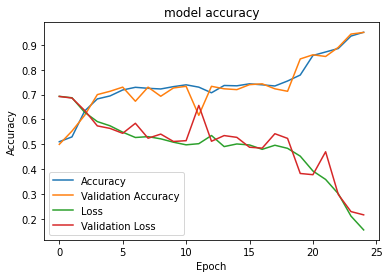

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","Loss","Validation Loss"])
plt.show()

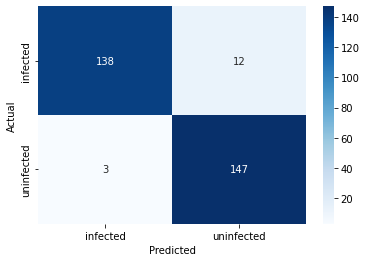

test accuracy : 95.0 


In [44]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/2k_dataset/vgg19_updated_224_manual_wali.h5")
filenames = test_batches.filenames
nb_samples = len(test_batches)
y_prob=[]
y_act=[]
test_batches.reset()
for _ in range(nb_samples):
    X_test, Y_test = test_batches.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)

predicted_class = [list(train_batches.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_batches.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='Blues', annot=True, fmt='d')
plt.show()
print("test accuracy : {} ".format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [45]:
from sklearn.metrics import classification_report
print(classification_report(actual_class, predicted_class))

              precision    recall  f1-score   support

    infected       0.98      0.92      0.95       150
  uninfected       0.92      0.98      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

